In [44]:
import os
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.metrics import categorical_crossentropy
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D

from keras import optimizers

In [45]:
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
#Setting the paths of each set

train_path = 'GT_train'
test_path = 'GT_test'
valid_path = 'GT_valid'

In [47]:
#Generating the image sets from their corresponding paths

train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224, 224), batch_size = 10, classes = ['s1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9','s10'] ) #class_mode = None 
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224, 224), batch_size = 4, classes = ['s1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9','s10']  ) #class_mode = None 
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224, 224), batch_size = 4, classes = ['s1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9','s10']  ) #class_mode = None 


Found 300 images belonging to 10 classes.
Found 20 images belonging to 10 classes.
Found 30 images belonging to 10 classes.


In [48]:
#function used to plot on jupyter notebook

def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize = figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows+1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=10)
            
        plt.imshow(ims[i], interpolation = None if interp else 'none')

In [49]:
imgs, labels = next(test_batches) 

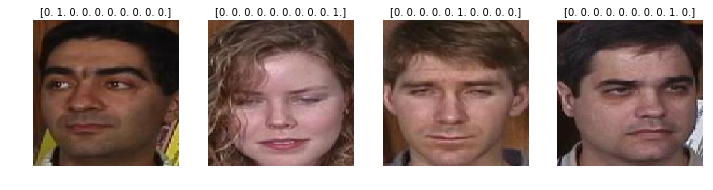

In [50]:
# images with their corresponding labels
plots(imgs, titles = labels)

In [51]:
import h5py

In [52]:
#importing the VGG16 model
vgg16_model = keras.applications.vgg16.VGG16()

In [53]:
vgg16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [54]:
#Setting it to sequential model
model = Sequential()
for layer in vgg16_model.layers:
    model.add(layer)

In [55]:
vgg16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [56]:
#Dropping the last layer which has 1000 nodes
model.layers.pop()

In [57]:
#freeze each layer to exclude it from updating weights
#this is done for the purpose of fine tuning a model
#this model is already trained on images
#we don't want to update any of their weights
for layer in model.layers:
    layer.trainable = False

In [58]:
#add the output layer
#it classifies the images into 10 categories
#since we are training it on 10 persons
model.add(Dense(10, activation='softmax'))

In [59]:
vgg16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [60]:
#setting the optimizer, loss function and number of epochs
from keras.optimizers import Adam
model.compile(Adam(lr = 0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [61]:
#training
model.fit_generator(train_batches, steps_per_epoch=10,
                   validation_data =valid_batches, validation_steps=4, epochs = 10, verbose = 2)

Epoch 1/10
 - 90s - loss: 2.2933 - acc: 0.1500 - val_loss: 2.2927 - val_acc: 0.1250
Epoch 2/10
 - 89s - loss: 2.2922 - acc: 0.1900 - val_loss: 2.2840 - val_acc: 0.1250
Epoch 3/10
 - 89s - loss: 2.2862 - acc: 0.2900 - val_loss: 2.2943 - val_acc: 0.0000e+00
Epoch 4/10
 - 89s - loss: 2.2781 - acc: 0.3200 - val_loss: 2.2747 - val_acc: 0.2500
Epoch 5/10
 - 93s - loss: 2.2787 - acc: 0.4300 - val_loss: 2.2808 - val_acc: 0.2500
Epoch 6/10
 - 95s - loss: 2.2728 - acc: 0.5000 - val_loss: 2.2727 - val_acc: 0.3750
Epoch 7/10
 - 92s - loss: 2.2676 - acc: 0.5600 - val_loss: 2.2802 - val_acc: 0.3750
Epoch 8/10
 - 96s - loss: 2.2633 - acc: 0.6200 - val_loss: 2.2661 - val_acc: 0.6250
Epoch 9/10
 - 94s - loss: 2.2592 - acc: 0.6000 - val_loss: 2.2695 - val_acc: 0.4375
Epoch 10/10
 - 91s - loss: 2.2550 - acc: 0.6400 - val_loss: 2.2666 - val_acc: 0.4375


Found 30 images belonging to 10 classes.


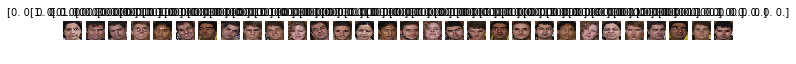

In [62]:
#setting the testing labeels and images
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224, 224), batch_size = 30, classes = ['s1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9','s10']  ) #class_mode = None 

test_imgs, test_labels = next(test_batches) 
plots(test_imgs, titles=test_labels)

In [63]:
#testing the model
predictions = model.predict_generator(test_batches, steps=1, verbose=0)

In [64]:
test_labels

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 

In [65]:
#transforming from one hot encoding to integers according to location 
#which is actually the labels of the person
test_array = [ np.where(r==1)[0][0] for r in test_labels ]
test_array

[4,
 0,
 8,
 5,
 3,
 0,
 1,
 8,
 5,
 6,
 9,
 0,
 7,
 4,
 3,
 7,
 9,
 2,
 6,
 1,
 7,
 2,
 3,
 9,
 4,
 5,
 8,
 1,
 6,
 2]

In [66]:
#output of model
predictions

array([[0.09960877, 0.09762285, 0.09851939, 0.10165699, 0.10202667,
        0.09722469, 0.10325105, 0.09789817, 0.10246138, 0.09973003],
       [0.10494743, 0.09547083, 0.0954846 , 0.10240713, 0.09417032,
        0.10609377, 0.09986112, 0.0996186 , 0.09808722, 0.10385903],
       [0.09973049, 0.09733376, 0.09955831, 0.10260742, 0.10144105,
        0.09608614, 0.10359854, 0.09769212, 0.10222404, 0.09972807],
       [0.10498513, 0.09503372, 0.0957577 , 0.10253401, 0.09362023,
        0.10647556, 0.09948102, 0.10004621, 0.09800462, 0.10406183],
       [0.10153764, 0.09954976, 0.09725498, 0.10111528, 0.10025859,
        0.09984411, 0.10269342, 0.09916117, 0.1000419 , 0.09854322],
       [0.10250979, 0.10029341, 0.09848409, 0.10008041, 0.10085774,
        0.0999067 , 0.10183376, 0.09923264, 0.09920985, 0.09759165],
       [0.10035836, 0.10468405, 0.09686788, 0.09868588, 0.10320813,
        0.09814556, 0.10418152, 0.09483563, 0.10298   , 0.0960531 ],
       [0.09586827, 0.0996711 , 0.0963363

In [67]:
#choosing max probability from output and replacing it by 1
#setting others to 0
prediction_ohe = np.zeros_like(predictions)
prediction_ohe[np.arange(len(predictions)), predictions.argmax(1)] = 1
prediction_ohe

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 

In [68]:
#transforming from one hot encoding to integers according to location 
#which is actually the labels of the person
prediction_array = [ np.where(r==1)[0][0] for r in prediction_ohe ]
prediction_array

[6,
 5,
 6,
 5,
 6,
 0,
 1,
 4,
 5,
 6,
 5,
 0,
 7,
 6,
 0,
 7,
 5,
 8,
 0,
 1,
 7,
 8,
 5,
 5,
 4,
 5,
 8,
 1,
 6,
 7]

In [69]:
#setting the confusion matrix
cm = confusion_matrix(test_array, prediction_array)

In [70]:
#function used to plot the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization
[[2 0 0 0 0 1 0 0 0 0]
 [0 3 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 2 0]
 [1 0 0 0 0 1 1 0 0 0]
 [0 0 0 0 1 0 2 0 0 0]
 [0 0 0 0 0 3 0 0 0 0]
 [1 0 0 0 0 0 2 0 0 0]
 [0 0 0 0 0 0 0 3 0 0]
 [0 0 0 0 1 0 1 0 1 0]
 [0 0 0 0 0 3 0 0 0 0]]


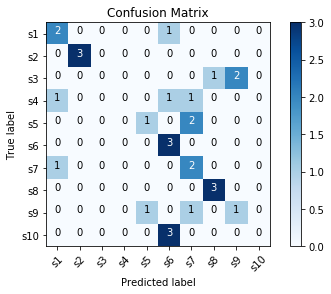

In [71]:
#results plotted on the confusion matrix

cm_plot_labels = ['s1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9','s10'] 
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')